# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [159]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
merged_data.sample(10)

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1509     s337    Zoniferol    Male          14          27          0   
1139     l700     Naftisol  Female          18          27         30   
596      b487     Ceftamin  Female           6          28          5   
76       z578     Ramicane    Male          11          16          5   
1447     r107     Propriva  Female           2          28         10   
183      i177     Ramicane    Male          10          18         40   
519      a492     Stelasyn    Male          20          25         25   
1720     w584    Infubinol    Male           3          29          0   
425      a444     Ramicane  Female          10          25         20   
1050     k483    Infubinol  Female          20          30         30   

      Tumor Volume (mm3)  Metastatic Sites  
1509           45.000000                 0  
1139           56.653215                 1  
596            46.213977                 0  
76             42.188787                 0  
1447           49.186011                 0  
183            35.557933                 2  
519            54.701229                 1  
1720           45.000000                 0  
425            41.714619                 0  
1050           59.747077                 2

In [48]:
# Checking the number of mice.
merged_data["Mouse ID"].nunique()

249

In [49]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [50]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = merged_data.loc[merged_data["Mouse ID"]=="g989",]
duplicate_mice_data

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data[merged_data['Mouse ID']!='g989']
clean_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [52]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
stdvar = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_pd = pd.DataFrame({
    "Mean Tumor Volume" : mean,
    "Median Tumor Volume" : median,
    "Tumor Volume Variance" : var,
    "Tumor Volume Std. Dev." : stdvar,
    "Tumor Volume Std. Err." : sem
})
summary_pd

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [55]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
data_mice = clean_df['Drug Regimen'].value_counts()
data_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of mice vs Drugs')

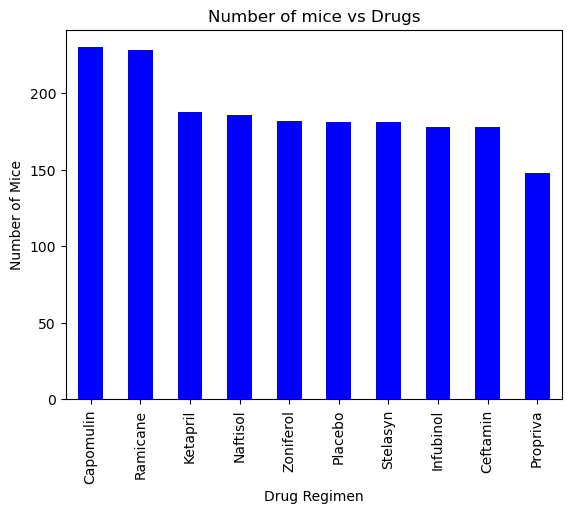

In [56]:
graph_1 = data_mice.plot.bar(color = 'b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of mice vs Drugs")

Text(0.5, 1.0, 'Number of mice vs Drugs')

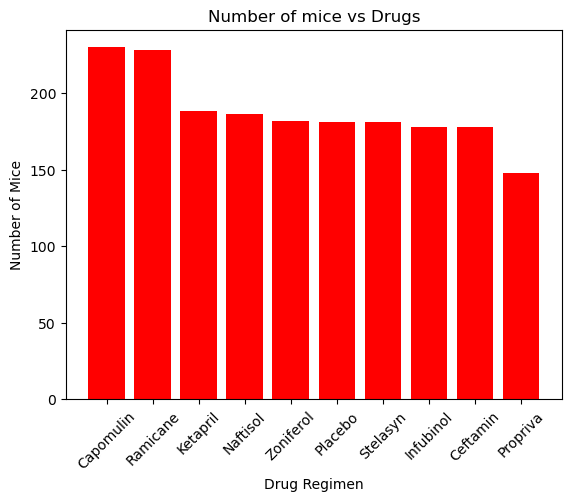

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(data_mice.index.values,data_mice.values,color='r')
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of mice vs Drugs")

In [70]:
gender_count = clean_df['Sex'].value_counts()
gender_count

Male      958
Female    922
Name: Sex, dtype: int64

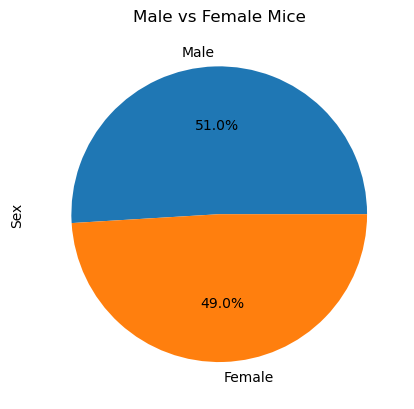

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count.plot.pie(autopct="%1.1f%%")
plt.title("Male vs Female Mice")
plt.show()

In [83]:
gender_count[1]

922

Text(0.5, 1.0, 'Male vs Female Mice')

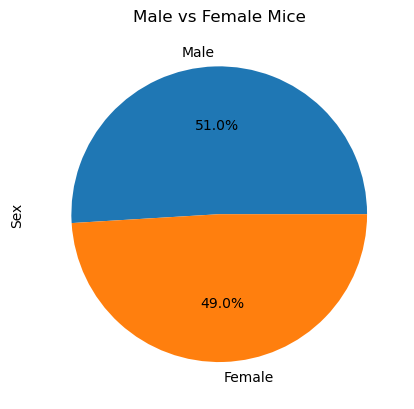

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
values = [gender_count[0],gender_count[1]]
plt.pie(values, labels = labels,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Male vs Female Mice")

## Quartiles, Outliers and Boxplots

In [134]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_new = pd.merge(Capomulin_vol, clean_df, on=('Mouse ID', 'Timepoint'))

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_new = pd.merge(Ramicane_vol, clean_df, on=('Mouse ID', 'Timepoint'))

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_new = pd.merge(Infubinol_vol, clean_df, on=('Mouse ID', 'Timepoint'))

Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_new = pd.merge(Ceftamin_vol, clean_df, on=('Mouse ID', 'Timepoint'))

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = pd.concat([Capomulin_new,Ramicane_new,Infubinol_new,Ceftamin_new])
new_df

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      b128         45    Capomulin  Female           9          22   
1      b742         45    Capomulin    Male           7          21   
2      f966         20    Capomulin    Male          16          17   
3      g288         45    Capomulin    Male           3          19   
4      g316         45    Capomulin  Female          22          22   
..      ...        ...          ...     ...         ...         ...   
20     x226          0     Ceftamin    Male          23          28   
21     x581         45     Ceftamin  Female          19          28   
22     x822         45     Ceftamin    Male           3          29   
23     y769         45     Ceftamin  Female           6          27   
24     y865         45     Ceftamin    Male          23          26   

    Tumor Volume (mm3)  Metastatic Sites  
0            38.982878                 2  
1            38.939633                 0  
2            30.485985                 0  
3            37.074024                 1  
4            40.159220                 2  
..                 ...               ...  
20           45.000000                 0  
21           64.634949                 3  
22           61.386660                 3  
23           68.594745                 4  
24           64.729837                 3  

[100 rows x 8 columns]

In [136]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    qrtle = drug_list[1].quantile([.25,.5,.75])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

AttributeError: 'str' object has no attribute 'quantile'

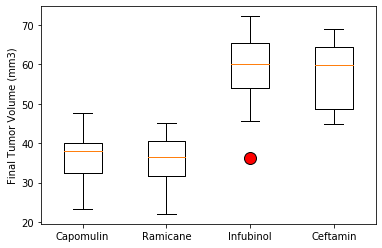

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

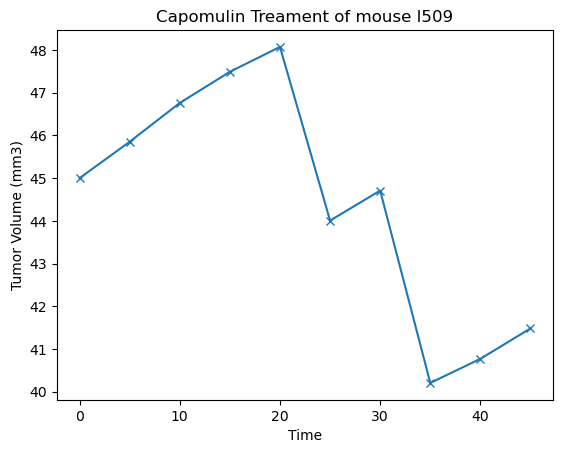

In [143]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_1 = clean_df.loc[clean_df['Mouse ID']=='l509']
plt.plot(mouse_1['Timepoint'],mouse_1['Tumor Volume (mm3)'],marker = 'x')
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treament of mouse l509")
plt.show()

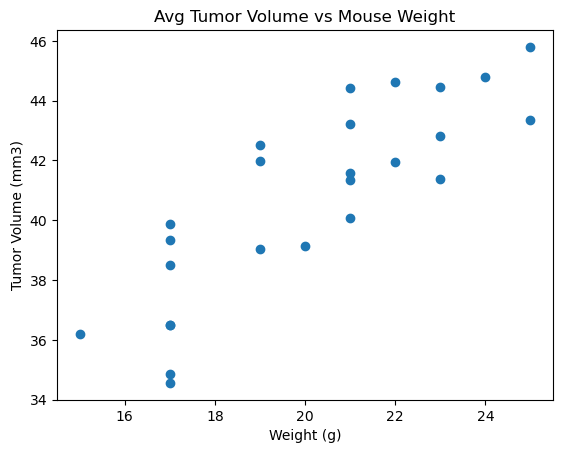

In [153]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_vol = Capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Avg Tumor Volume vs Mouse Weight")
plt.show()

## Correlation and Regression

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712483e-07)


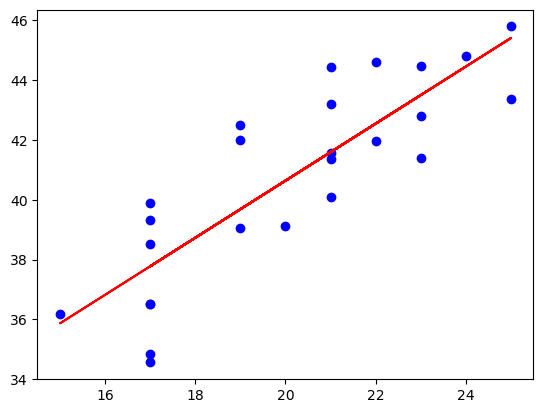

In [171]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'])
print(correlation)
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_vol["Weight (g)"],avg_vol["Tumor Volume (mm3)"])
regress_values=avg_vol["Weight (g)"]* slope + intercept
plt.plot(avg_vol["Weight (g)"],regress_values,color='r')
plt.scatter(avg_vol["Weight (g)"],avg_vol["Tumor Volume (mm3)"],color='b')